## **PREPROCESSING NWO DATASET**

## TABLE OF CONTENTS:
- [IMPORTS](#imports)
- [LOAD DATASET](#load_data)
- [CLEAN PROJECT DATA](#project_data)
    - [START DATES](#start_dates)
    - [DROP EMPTY COLUMNS](#drop_columns)
- [TEXT PREPROCESSING FOR BERT](#text_prep)
- [TRANSLATION](#translation)
- [TEXT LENGTH](#text_length)
- [EXPORT DATA](#export)

## IMPORTS <a class="anchor" id="imports"></a>

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import re
from IPython.display import display
from langdetect import detect
from tqdm.notebook import tqdm
from deep_translator import GoogleTranslator
from transformers import BertTokenizer

## LOAD DATASET <a class="anchor" id="load_data"></a>

The last update was on 3 June 2024

In [2]:
df_projects = pd.read_pickle("../data/nwo_df_projects.pkl")
# df_members = pd.read_pickle("../data/df_members.pkl")
# df_products = pd.read_pickle("../data/df_products.pkl")

In [3]:
print('projects:')
print(df_projects.shape)
display(df_projects.head(2))

# print('\nmembers:')
# print(df_members.shape)
# display(df_members.head(2))

# print('\nproducts:')
# print(df_products.shape)
# display(df_products.head(2))

projects:
(15630, 15)


,project_id,grant_id,parent_project_id,title,funding_scheme_id,funding_scheme,department,sub_department,start_date,end_date,summary_nl,summary_en,summary_update,project_members,products
0,612.001.210,None,None,Enhancing efficiency and expressiveness of the...,2691,Vrije competitie Vrije competitie EW 2012 EW,Exacte en Natuurwetenschappen,Exacte Wetenschappen,2014-08-01T00:00:00,2018-12-31T00:00:00,Coalgebraic coinduction generalises the bisimu...,Coalgebraic coinduction generalises the bisimu...,None,"[{'role': 'Project leader', 'member_id': 99959...",[{'title': 'Regular varieties of automata and ...
1,12859,None,None,Modular self-assembling fluorescent nano-parti...,231,Samenwerkingsprogramma High Tech Systemen en M...,Toegepaste en Technische Wetenschappen,Technologiestichting STW,2014-06-01T00:00:00,2018-05-31T00:00:00,"There is a need for novel nanoparticles, for d...","There is a need for novel nanoparticles, for d...",None,"[{'role': 'Project leader', 'member_id': 19849...",[{'title': 'Fluorene benzothiadiazole co-oligo...


## CLEAN PROJECT DATA <a class="anchor" id="project_data"></a>

### START DATES <a class="anchor" id="start_dates"></a>

In [4]:
# Convert 'start_date' column to datettime type and filter out invalid dates
df_projects['start_date'] = pd.to_datetime(df_projects['start_date'], errors='coerce')

# Remove rows where start_date is NaT (Not a Time)
df_projects = df_projects.dropna(subset=['start_date'])

# Add new column 'year' with only the start year of each project
df_projects['start_year'] = df_projects['start_date'].dt.year

In [5]:
# Check
print('projects:')
print(df_projects.shape)
display(df_projects.head(2))

print(df_projects.info())

projects:
(14795, 16)


,project_id,grant_id,parent_project_id,title,funding_scheme_id,funding_scheme,department,sub_department,start_date,end_date,summary_nl,summary_en,summary_update,project_members,products,start_year
0,612.001.210,None,None,Enhancing efficiency and expressiveness of the...,2691,Vrije competitie Vrije competitie EW 2012 EW,Exacte en Natuurwetenschappen,Exacte Wetenschappen,2014-08-01,2018-12-31T00:00:00,Coalgebraic coinduction generalises the bisimu...,Coalgebraic coinduction generalises the bisimu...,None,"[{'role': 'Project leader', 'member_id': 99959...",[{'title': 'Regular varieties of automata and ...,2014
1,12859,None,None,Modular self-assembling fluorescent nano-parti...,231,Samenwerkingsprogramma High Tech Systemen en M...,Toegepaste en Technische Wetenschappen,Technologiestichting STW,2014-06-01,2018-05-31T00:00:00,"There is a need for novel nanoparticles, for d...","There is a need for novel nanoparticles, for d...",None,"[{'role': 'Project leader', 'member_id': 19849...",[{'title': 'Fluorene benzothiadiazole co-oligo...,2014


<class 'pandas.core.frame.DataFrame'>
Index: 14795 entries, 0 to 15629
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   project_id         14795 non-null  object        
 1   grant_id           0 non-null      object        
 2   parent_project_id  255 non-null    object        
 3   title              14795 non-null  object        
 4   funding_scheme_id  14795 non-null  int64         
 5   funding_scheme     14795 non-null  object        
 6   department         14795 non-null  object        
 7   sub_department     14795 non-null  object        
 8   start_date         14795 non-null  datetime64[ns]
 9   end_date           9622 non-null   object        
 10  summary_nl         14795 non-null  object        
 11  summary_en         14795 non-null  object        
 12  summary_update     0 non-null      object        
 13  project_members    14795 non-null  object        
 14  products   

### DROP EMPTY COLUMNS <a class="anchor" id="drop_columns"></a>

In [6]:
# Drop empty columns 'grant_id' and 'summary_update'
df_projects = df_projects.drop(columns=['grant_id', 'summary_update'])

# Check
print(df_projects.info())

<class 'pandas.core.frame.DataFrame'>
Index: 14795 entries, 0 to 15629
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   project_id         14795 non-null  object        
 1   parent_project_id  255 non-null    object        
 2   title              14795 non-null  object        
 3   funding_scheme_id  14795 non-null  int64         
 4   funding_scheme     14795 non-null  object        
 5   department         14795 non-null  object        
 6   sub_department     14795 non-null  object        
 7   start_date         14795 non-null  datetime64[ns]
 8   end_date           9622 non-null   object        
 9   summary_nl         14795 non-null  object        
 10  summary_en         14795 non-null  object        
 11  project_members    14795 non-null  object        
 12  products           6110 non-null   object        
 13  start_year         14795 non-null  int32         
dtypes: datetime

## TEXT PREPROCESSING FOR BERT <a class="anchor" id="text_prep"></a>

In [7]:
# Function for preprocessing textual data (for BERT)
def preprocess_text(text):
    # Lowercase the text and remove non-alphabetic characters
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # removing non-alphabetic characters
    # Use regex to keep only words
    text = ' '.join(re.findall(r'\b[a-z]+\b', text))
    return text

# Apply the preprocessing to both 'title' and 'summary_en'
df_docs_nwo = df_projects.copy()
df_docs_nwo['title'] = df_docs_nwo['title'].apply(preprocess_text)
df_docs_nwo['summary_en'] = df_docs_nwo['summary_en'].apply(preprocess_text)

In [8]:
# Combine 'title' and 'summary_en' into a new column 'text'
df_docs_nwo['text'] = df_docs_nwo['title'] + ' ' + df_docs_nwo['summary_en']

# Check
display(df_docs_nwo.head(5))
print(df_docs_nwo.shape)

,project_id,parent_project_id,title,funding_scheme_id,funding_scheme,department,sub_department,start_date,end_date,summary_nl,summary_en,project_members,products,start_year,text
0,612.001.210,None,enhancing efficiency and expressiveness of the...,2691,Vrije competitie Vrije competitie EW 2012 EW,Exacte en Natuurwetenschappen,Exacte Wetenschappen,2014-08-01,2018-12-31T00:00:00,Coalgebraic coinduction generalises the bisimu...,coalgebraic coinduction generalises the bisimu...,"[{'role': 'Project leader', 'member_id': 99959...",[{'title': 'Regular varieties of automata and ...,2014,enhancing efficiency and expressiveness of the...
1,12859,None,modular selfassembling fluorescent nanoparticl...,231,Samenwerkingsprogramma High Tech Systemen en M...,Toegepaste en Technische Wetenschappen,Technologiestichting STW,2014-06-01,2018-05-31T00:00:00,"There is a need for novel nanoparticles, for d...",there is a need for novel nanoparticles for di...,"[{'role': 'Project leader', 'member_id': 19849...",[{'title': 'Fluorene benzothiadiazole co-oligo...,2014,modular selfassembling fluorescent nanoparticl...
2,406-12-079,None,can repeated brain stimulation facilitate trai...,2062,Onderzoekstalent 2012 MaGW,Sociale en Geesteswetenschappen,Maatschappij- en Gedragswetenschappen,2014-06-01,2018-12-31T00:00:00,Research has shown that our brains are constan...,research has shown that our brains are constan...,"[{'role': 'Project leader', 'member_id': 11454...","[{'title': 'Beoogd: Proefschrift', 'type': 'Pr...",2014,can repeated brain stimulation facilitate trai...
3,12824,None,tailoring new nanosilica and its application i...,231,Samenwerkingsprogramma High Tech Systemen en M...,Toegepaste en Technische Wetenschappen,Technologiestichting STW,2014-05-01,2020-09-01T00:00:00,2.1\tResearch Summary\nAt present a wide range...,at present a wide range of silica products are...,"[{'role': 'Researcher', 'member_id': 172463, '...",None,2014,tailoring new nanosilica and its application i...
4,12813,None,image guided cancer therapy realtime target tr...,231,Samenwerkingsprogramma High Tech Systemen en M...,Toegepaste en Technische Wetenschappen,Technologiestichting STW,2014-04-01,2018-12-14T00:00:00,External Beam Radiotherapy (EBRT) and High Int...,external beam radiotherapy ebrt and high inten...,"[{'role': 'Co-applicant', 'member_id': 108579,...",None,2014,image guided cancer therapy realtime target tr...


(14795, 15)


## TRANSLATION <a class="anchor" id="translation"></a>

In [9]:
# Function to detect language
def detect_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'

# Apply the function to the 'text' column and store the detected language in the 'language' column
tqdm.pandas(desc="Detecting languages")
df_docs_nwo['language'] = df_docs_nwo['text'].progress_apply(detect_language)

# Check
display(df_docs_nwo.head(5))

Detecting languages:   0%|          | 0/14795 [00:00<?, ?it/s]

,project_id,parent_project_id,title,funding_scheme_id,funding_scheme,department,sub_department,start_date,end_date,summary_nl,summary_en,project_members,products,start_year,text,language
0,612.001.210,None,enhancing efficiency and expressiveness of the...,2691,Vrije competitie Vrije competitie EW 2012 EW,Exacte en Natuurwetenschappen,Exacte Wetenschappen,2014-08-01,2018-12-31T00:00:00,Coalgebraic coinduction generalises the bisimu...,coalgebraic coinduction generalises the bisimu...,"[{'role': 'Project leader', 'member_id': 99959...",[{'title': 'Regular varieties of automata and ...,2014,enhancing efficiency and expressiveness of the...,en
1,12859,None,modular selfassembling fluorescent nanoparticl...,231,Samenwerkingsprogramma High Tech Systemen en M...,Toegepaste en Technische Wetenschappen,Technologiestichting STW,2014-06-01,2018-05-31T00:00:00,"There is a need for novel nanoparticles, for d...",there is a need for novel nanoparticles for di...,"[{'role': 'Project leader', 'member_id': 19849...",[{'title': 'Fluorene benzothiadiazole co-oligo...,2014,modular selfassembling fluorescent nanoparticl...,en
2,406-12-079,None,can repeated brain stimulation facilitate trai...,2062,Onderzoekstalent 2012 MaGW,Sociale en Geesteswetenschappen,Maatschappij- en Gedragswetenschappen,2014-06-01,2018-12-31T00:00:00,Research has shown that our brains are constan...,research has shown that our brains are constan...,"[{'role': 'Project leader', 'member_id': 11454...","[{'title': 'Beoogd: Proefschrift', 'type': 'Pr...",2014,can repeated brain stimulation facilitate trai...,en
3,12824,None,tailoring new nanosilica and its application i...,231,Samenwerkingsprogramma High Tech Systemen en M...,Toegepaste en Technische Wetenschappen,Technologiestichting STW,2014-05-01,2020-09-01T00:00:00,2.1\tResearch Summary\nAt present a wide range...,at present a wide range of silica products are...,"[{'role': 'Researcher', 'member_id': 172463, '...",None,2014,tailoring new nanosilica and its application i...,en
4,12813,None,image guided cancer therapy realtime target tr...,231,Samenwerkingsprogramma High Tech Systemen en M...,Toegepaste en Technische Wetenschappen,Technologiestichting STW,2014-04-01,2018-12-14T00:00:00,External Beam Radiotherapy (EBRT) and High Int...,external beam radiotherapy ebrt and high inten...,"[{'role': 'Co-applicant', 'member_id': 108579,...",None,2014,image guided cancer therapy realtime target tr...,en


In [10]:
# Checking for texts that are not in English
non_eng = df_docs_nwo[df_docs_nwo['language'] != 'en']
print("Number of texts that are not English:", len(non_eng))
display(non_eng.head(5))


Number of texts that are not English: 3270


,project_id,parent_project_id,title,funding_scheme_id,funding_scheme,department,sub_department,start_date,end_date,summary_nl,summary_en,project_members,products,start_year,text,language
14,328-98-003,None,smart moves,2491,Sport: meedoen SPORT 2012 GW,Sociale en Geesteswetenschappen,Geesteswetenschappen,2014-01-01,2019-10-16T00:00:00,Ondanks het overduidelijke wetenschappelijke b...,ondanks het overduidelijke wetenschappelijke b...,"[{'role': 'Project leader', 'member_id': 13341...",[{'title': 'Effects of one versus two bouts of...,2014,smart moves ondanks het overduidelijke wetensc...,nl
27,328-98-008,None,sportvoorzieningen en sportdeelname naar een o...,2491,Sport: meedoen SPORT 2012 GW,Sociale en Geesteswetenschappen,Geesteswetenschappen,2013-10-01,2018-05-14T00:00:00,Van de overheidsmiddelen besteed aan sport kom...,van de overheidsmiddelen besteed aan sport kom...,"[{'role': 'Researcher', 'member_id': 558589, '...","[{'title': 'Sportaccommodaties: wat, waar en v...",2013,sportvoorzieningen en sportdeelname naar een o...,nl
51,12835,None,optocoupling in cmos oic,231,Samenwerkingsprogramma High Tech Systemen en M...,Toegepaste en Technische Wetenschappen,Technologiestichting STW,2013-09-01,2018-06-30T00:00:00,Zogenaamde ?smart power? technologieen zoals A...,zogenaamde smart power technologieen zoals abc...,"[{'role': 'Researcher', 'member_id': 279809, '...",[{'title': 'Opto-electronic Modeling of Light ...,2013,optocoupling in cmos oic zogenaamde smart powe...,nl
58,328-98-006,None,van voetbalvrouwen tot vrouwenvoetbal,2491,Sport: meedoen SPORT 2012 GW,Sociale en Geesteswetenschappen,Geesteswetenschappen,2013-09-01,2017-08-31T00:00:00,Meidenvoetbal is de snelstgroeiende sport ter ...,meidenvoetbal is de snelstgroeiende sport ter ...,"[{'role': 'Main Applicant', 'member_id': 17113...","[{'title': 'Halleluja! Is voetbal god?', 'year...",2013,van voetbalvrouwen tot vrouwenvoetbal meidenvo...,nl
59,328-98-004,None,meedoen met een motorische beperking training ...,2491,Sport: meedoen SPORT 2012 GW,Sociale en Geesteswetenschappen,Geesteswetenschappen,2013-09-01,2017-09-01T00:00:00,Kinderen met motorische ontwikkelingsstoorniss...,kinderen met motorische ontwikkelingsstoorniss...,"[{'role': 'Project leader', 'member_id': 11276...",[{'title': 'The influence of errors during pra...,2013,meedoen met een motorische beperking training ...,nl


In [11]:
# Function for translating text from Dutch to English
def translate_text(text):
    try:
        return GoogleTranslator(source='nl', target='en').translate(text)
    except Exception as e:
        return text

# Function for translating the 'text' column from this dataset from Dutch to English
def translate_dataset(df):
    # Check that required columns are present
    if 'language' not in df.columns or 'text' not in df.columns:
        raise ValueError("DataFrame must contain 'language' and 'text' columns")
    
    # Filter out rows where language is Dutch
    dutch_df = df[df['language'] == 'nl']
    
    # Translate the Dutch text to English in batches
    dutch_df['text'] = [translate_text(text) for text in tqdm(dutch_df['text'], desc="Translating")]
    
    # Update the original dataframe with the translated text
    df.update(dutch_df)
    
    return df

In [12]:
# Completely translate the 'text' column in the NWO dataset to English
df_translate = df_docs_nwo.copy()
df_translated_nwo = translate_dataset(df_translate)

Translating:   0%|          | 0/3132 [00:00<?, ?it/s]

/var/folders/k9/4gk6zxg14nqdsf18lm9mwdb40000gn/T/ipykernel_34525/3783869340.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dutch_df['text'] = [translate_text(text) for text in tqdm(dutch_df['text'], desc="Translating")]


In [13]:
# Check
df_translated_nwo.head(10)

,project_id,parent_project_id,title,funding_scheme_id,funding_scheme,department,sub_department,start_date,end_date,summary_nl,summary_en,project_members,products,start_year,text,language
0,612.001.210,None,enhancing efficiency and expressiveness of the...,2691,Vrije competitie Vrije competitie EW 2012 EW,Exacte en Natuurwetenschappen,Exacte Wetenschappen,2014-08-01,2018-12-31T00:00:00,Coalgebraic coinduction generalises the bisimu...,coalgebraic coinduction generalises the bisimu...,"[{'role': 'Project leader', 'member_id': 99959...",[{'title': 'Regular varieties of automata and ...,2014,enhancing efficiency and expressiveness of the...,en
1,12859,None,modular selfassembling fluorescent nanoparticl...,231,Samenwerkingsprogramma High Tech Systemen en M...,Toegepaste en Technische Wetenschappen,Technologiestichting STW,2014-06-01,2018-05-31T00:00:00,"There is a need for novel nanoparticles, for d...",there is a need for novel nanoparticles for di...,"[{'role': 'Project leader', 'member_id': 19849...",[{'title': 'Fluorene benzothiadiazole co-oligo...,2014,modular selfassembling fluorescent nanoparticl...,en
2,406-12-079,None,can repeated brain stimulation facilitate trai...,2062,Onderzoekstalent 2012 MaGW,Sociale en Geesteswetenschappen,Maatschappij- en Gedragswetenschappen,2014-06-01,2018-12-31T00:00:00,Research has shown that our brains are constan...,research has shown that our brains are constan...,"[{'role': 'Project leader', 'member_id': 11454...","[{'title': 'Beoogd: Proefschrift', 'type': 'Pr...",2014,can repeated brain stimulation facilitate trai...,en
3,12824,None,tailoring new nanosilica and its application i...,231,Samenwerkingsprogramma High Tech Systemen en M...,Toegepaste en Technische Wetenschappen,Technologiestichting STW,2014-05-01,2020-09-01T00:00:00,2.1\tResearch Summary\nAt present a wide range...,at present a wide range of silica products are...,"[{'role': 'Researcher', 'member_id': 172463, '...",None,2014,tailoring new nanosilica and its application i...,en
4,12813,None,image guided cancer therapy realtime target tr...,231,Samenwerkingsprogramma High Tech Systemen en M...,Toegepaste en Technische Wetenschappen,Technologiestichting STW,2014-04-01,2018-12-14T00:00:00,External Beam Radiotherapy (EBRT) and High Int...,external beam radiotherapy ebrt and high inten...,"[{'role': 'Co-applicant', 'member_id': 108579,...",None,2014,image guided cancer therapy realtime target tr...,en
5,360-25-140,None,parables and the partings of the ways,2704,Vrije competitie Vrije competitie GW VC 2013 GW,Sociale en Geesteswetenschappen,Geesteswetenschappen,2014-04-01,2020-01-31T00:00:00,This comparative research on Jewish and Christ...,this comparative research on jewish and christ...,"[{'role': 'Main Applicant', 'member_id': 24085...",[{'title': '‘Werkers in de Wijngaard’ Bijbels...,2014,parables and the partings of the ways this com...,en
6,612.001.212,None,probabilistic protocol analysis of care processes,2691,Vrije competitie Vrije competitie EW 2012 EW,Exacte en Natuurwetenschappen,Exacte Wetenschappen,2014-03-17,2018-04-16T00:00:00,With the widespread introduction of informatio...,with the widespread introduction of informatio...,"[{'role': 'Project leader', 'member_id': 18049...",[{'title': 'Understanding disease processes by...,2014,probabilistic protocol analysis of care proces...,en
7,612.001.218,None,constraintbased language translation for appro...,2691,Vrije competitie Vrije competitie EW 2012 EW,Exacte en Natuurwetenschappen,Exacte Wetenschappen,2014-03-01,2018-05-31T00:00:00,The proposed project aims to improve machine t...,the proposed project aims to improve machine t...,"[{'role': 'Main Applicant', 'member_id': 10852...",[{'title': 'Dependency-Based Characterization ...,2014,constraintbased language translation for appro...,en
8,12853,None,emcrobust design of automotive ic products and...,231,Samenwerkingsprogramma High Tech Systemen en M...,Toegepaste en Technische Wetenschappen,Technologiestichting STW,2014-0

In [14]:
# Detecting languages again from the translated texts and store the detected language in the column 'language'
tqdm.pandas(desc="Detecting languages")
df_translated_nwo['language'] = df_translated_nwo['text'].progress_apply(detect_language)

Detecting languages:   0%|          | 0/14795 [00:00<?, ?it/s]

In [15]:
# Checking if all rows are in English now
all_english = df_translated_nwo['language'].eq('en').all()
if all_english:
    print("All rows are in English.")
else:
    print("Not all rows are in English.")

Not all rows are in English.


In [16]:
# Checking if the non-translated rows are actually not in English
non_eng = df_translated_nwo[df_translated_nwo['language'] != 'en']

# Print the non-English texts
print("Untranslatable texts in dataset:",len(non_eng))
print(non_eng['text'])

Untranslatable texts in dataset: 163
430      de kolonie op drift mijn onderzoek betreft de ...
889      functionele karakterisatie en validatie van ni...
896      europees plantenembryologie consortium tijdens...
1731     ecomorphological management of tidal flats how...
1735                                      pressure groups 
                               ...                        
13157                                       vgquests fdut 
13183    consumer demand for circular urban living cdcu...
13630                         ictprijs dr ivano malavolta 
13669                                         contribution
15451    defining the roles of complement in neurodegen...
Name: text, Length: 163, dtype: object


In [17]:
# Computing average text-length for non-English texts
total_length = 0
for text in non_eng['text']:
    total_length += len(text)

print("Average text length for non-eng texts:", total_length/len(non_eng['text']))

Average text length for non-eng texts: 177.85276073619633


In [18]:
# Drop all non-English texts
df_english_nwo = df_translated_nwo[df_translated_nwo['language'] == 'en']

# Show size of the dataset now
print(df_english_nwo.shape)

(14632, 16)


In [19]:
# Preprocess text again (for capital letters that might have reoccurred after translation)
df_english_nwo['text'] = df_english_nwo['text'].apply(preprocess_text)

/var/folders/k9/4gk6zxg14nqdsf18lm9mwdb40000gn/T/ipykernel_34525/2220000637.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_english_nwo['text'] = df_english_nwo['text'].apply(preprocess_text)


## TEXT LENGTH <a class="anchor" id="text_length"></a>

In [20]:
# Load the BERT tokenizer (assuming the 'bert-base-uncased' model)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

Token indices sequence length is longer than the specified maximum sequence length for this model (560 > 512). Running this sequence through the model will result in indexing errors
/var/folders/k9/4gk6zxg14nqdsf18lm9mwdb40000gn/T/ipykernel_34525/410997312.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_english_nwo['token_count'] = df_english_nwo['text'].apply(count_tokens)


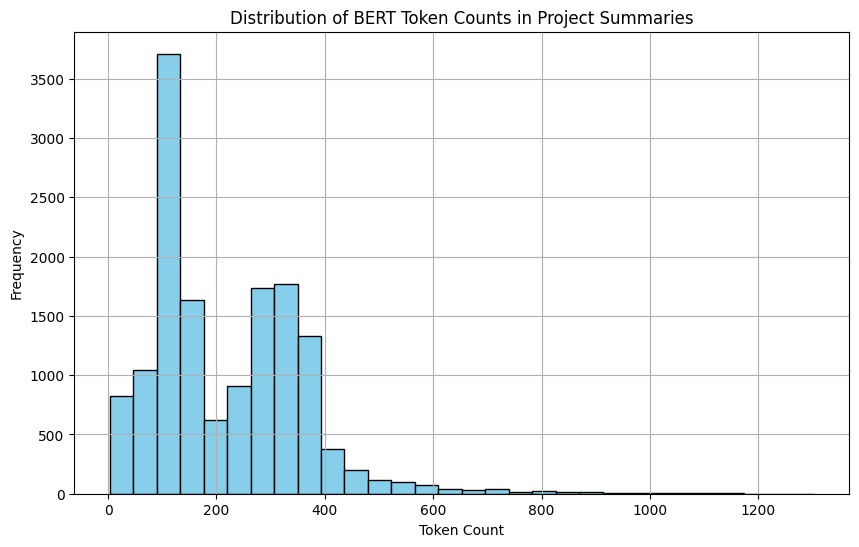

In [21]:
# Function to count tokens
def count_tokens(text):
    return len(tokenizer.encode(text, add_special_tokens=True))

# Apply the function to the 'text' column
df_english_nwo['token_count'] = df_english_nwo['text'].apply(count_tokens)

# Plotting the distribution of token counts
plt.figure(figsize=(10, 6))
plt.hist(df_english_nwo['token_count'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of BERT Token Counts in Project Summaries')
plt.xlabel('Token Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [22]:
# Defining a minimum text length for descriptive information
minimum_length = 20
short_texts = df_english_nwo[df_english_nwo['token_count'] < minimum_length]
print('Number of projects with a text smaller than', minimum_length, 'tokens:', len(short_texts))

Number of projects with a text smaller than 20 tokens: 568


In [23]:
# Removing rows with texts shorter than minimum length from dataset
df_english_nwo = df_english_nwo.drop(short_texts.index)
display(df_english_nwo.head(5))
print(df_english_nwo.shape)

,project_id,parent_project_id,title,funding_scheme_id,funding_scheme,department,sub_department,start_date,end_date,summary_nl,summary_en,project_members,products,start_year,text,language,token_count
0,612.001.210,None,enhancing efficiency and expressiveness of the...,2691,Vrije competitie Vrije competitie EW 2012 EW,Exacte en Natuurwetenschappen,Exacte Wetenschappen,2014-08-01,2018-12-31T00:00:00,Coalgebraic coinduction generalises the bisimu...,coalgebraic coinduction generalises the bisimu...,"[{'role': 'Project leader', 'member_id': 99959...",[{'title': 'Regular varieties of automata and ...,2014,enhancing efficiency and expressiveness of the...,en,314
1,12859,None,modular selfassembling fluorescent nanoparticl...,231,Samenwerkingsprogramma High Tech Systemen en M...,Toegepaste en Technische Wetenschappen,Technologiestichting STW,2014-06-01,2018-05-31T00:00:00,"There is a need for novel nanoparticles, for d...",there is a need for novel nanoparticles for di...,"[{'role': 'Project leader', 'member_id': 19849...",[{'title': 'Fluorene benzothiadiazole co-oligo...,2014,modular selfassembling fluorescent nanoparticl...,en,369
2,406-12-079,None,can repeated brain stimulation facilitate trai...,2062,Onderzoekstalent 2012 MaGW,Sociale en Geesteswetenschappen,Maatschappij- en Gedragswetenschappen,2014-06-01,2018-12-31T00:00:00,Research has shown that our brains are constan...,research has shown that our brains are constan...,"[{'role': 'Project leader', 'member_id': 11454...","[{'title': 'Beoogd: Proefschrift', 'type': 'Pr...",2014,can repeated brain stimulation facilitate trai...,en,117
3,12824,None,tailoring new nanosilica and its application i...,231,Samenwerkingsprogramma High Tech Systemen en M...,Toegepaste en Technische Wetenschappen,Technologiestichting STW,2014-05-01,2020-09-01T00:00:00,2.1\tResearch Summary\nAt present a wide range...,at present a wide range of silica products are...,"[{'role': 'Researcher', 'member_id': 172463, '...",None,2014,tailoring new nanosilica and its application i...,en,460
4,12813,None,image guided cancer therapy realtime target tr...,231,Samenwerkingsprogramma High Tech Systemen en M...,Toegepaste en Technische Wetenschappen,Technologiestichting STW,2014-04-01,2018-12-14T00:00:00,External Beam Radiotherapy (EBRT) and High Int...,external beam radiotherapy ebrt and high inten...,"[{'role': 'Co-applicant', 'member_id': 108579,...",None,2014,image guided cancer therapy realtime target tr...,en,389


(14064, 17)


## EXPORT DATA <a class="anchor" id="export"></a>

In [24]:
# Exporting clean dataset to pickle file
df_english_nwo.to_pickle(f"../data/nwo_df_eng.pkl")